# Use Bro log for experiment
- [THE CTU-13 DATASET](https://www.stratosphereips.org/datasets-ctu13/)

In [1]:
# import tools
import pandas as pd
import numpy as np
from bat.log_to_dataframe import LogToDataFrame
import warnings

# ignore warning
warnings.simplefilter('ignore')

## Bro log with scanning

In [2]:
# Read into dataframe
df = LogToDataFrame('CTU-13 Dataset/5 - 46/conn.log')
df['duration'] = [d / np.timedelta64(1, 's') for d in df.ix[:,"duration"]]

df.dtypes

Successfully monitoring CTU-13 Dataset/5 - 46/conn.log...


conn_state         object
duration          float64
history            object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
local_orig           bool
local_resp           bool
missed_bytes        int64
orig_bytes          int64
orig_ip_bytes       int64
orig_pkts           int64
proto              object
resp_bytes          int64
resp_ip_bytes       int64
resp_pkts           int64
service            object
tunnel_parents     object
uid                object
dtype: object

In [3]:
# Select tcp packets
df = df[df['proto']=='tcp']

### Map string to number

In [4]:
# Unique states
states = df['conn_state'].unique()
states

array(['REJ', 'SF', 'RSTO', 'RSTOS0', 'SH', 'S0', 'SHR', 'RSTRH', 'OTH',
       'RSTR', 'S1', 'S2', 'S3'], dtype=object)

In [5]:
# Map state to number
states_dic = dict(zip(states, list(range(len(states)))))
states_dic

{'OTH': 8,
 'REJ': 0,
 'RSTO': 2,
 'RSTOS0': 3,
 'RSTR': 9,
 'RSTRH': 7,
 'S0': 5,
 'S1': 10,
 'S2': 11,
 'S3': 12,
 'SF': 1,
 'SH': 4,
 'SHR': 6}

In [6]:
# Set the key
df['conn_state'] = df['conn_state'].apply(lambda x: states_dic.get(x,x))
df['conn_state'].head()

ts
2011-08-15 22:43:21.235287    0
2011-08-15 22:43:22.059111    0
2011-08-15 22:43:22.728791    0
2011-08-15 22:43:24.988213    0
2011-08-15 22:43:20.934767    1
Name: conn_state, dtype: int64

In [7]:
# Map history to number
history = df['history'].unique()
history_dic = dict(zip(history, list(range(len(history)))))

df['history'] = df['history'].apply(lambda x: history_dic.get(x,x))
df['history'].head(10)

ts
2011-08-15 22:43:21.235287    0
2011-08-15 22:43:22.059111    0
2011-08-15 22:43:22.728791    0
2011-08-15 22:43:24.988213    0
2011-08-15 22:43:20.934767    1
2011-08-15 22:43:20.975344    2
2011-08-15 22:43:21.020784    3
2011-08-15 22:43:21.021022    4
2011-08-15 22:43:21.107716    5
2011-08-15 22:43:20.934775    6
Name: history, dtype: int64

In [8]:
# Split Bot data and set the class 
bot_ip = '147.32.84.165'
conn = df['id.orig_h'] == bot_ip
bot_df = df[conn]
bot_df['class'] = 'scan'

bot_df.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,class
ts,,,,,,,,,,,,,,,,,,,,,
2011-08-15 22:52:53.203182,2,0.037394,109,147.32.84.165,1027,74.125.232.195,80,False,False,0,...,561,4,tcp,77,205,3,http,(empty),C7HBqR2JHyrNKUyWl3,scan
2011-08-15 22:53:48.173394,1,0.185357,18,147.32.84.165,1039,94.63.149.152,80,False,False,23360,...,778,17,tcp,25790,26638,21,http,(empty),CNGDMC4xsPWpYeyW96,scan
2011-08-15 22:53:52.346741,1,0.290416,18,147.32.84.165,1040,94.63.149.152,80,False,False,118260,...,2697,65,tcp,133382,137190,95,http,(empty),CFrGgk3mj6XQSEMd1c,scan
2011-08-15 22:53:59.980186,1,0.272489,18,147.32.84.165,1041,94.63.150.52,80,False,False,0,...,376,5,tcp,176,380,5,http,(empty),CY1yfr14ymxM8Zfr6l,scan
2011-08-15 22:53:59.980443,1,0.272656,18,147.32.84.165,1042,94.63.150.52,80,False,False,0,...,376,5,tcp,176,380,5,http,(empty),C64Vm73BUuo9SlNUwc,scan


In [9]:
# Split normal data and set the class
normal_df = df[~conn]
normal_df['class'] = 'normal'
normal_df.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,class
ts,,,,,,,,,,,,,,,,,,,,,
2011-08-15 22:43:21.235287,0,0.000187,0,31.35.60.144,4949,147.32.84.118,6881,False,False,0,...,48,1,tcp,0,40,1,-,(empty),Cq2VTm3uPhjsX5NGdc,normal
2011-08-15 22:43:22.059111,0,0.000185,0,76.240.24.212,3711,147.32.84.118,6881,False,False,0,...,48,1,tcp,0,40,1,-,(empty),CEC5KV1atnzeUGvx2i,normal
2011-08-15 22:43:22.728791,0,0.000160,0,76.240.24.212,3711,147.32.84.118,6881,False,False,0,...,48,1,tcp,0,40,1,-,(empty),CZLcOBDXqXWwpwz82,normal
2011-08-15 22:43:24.988213,0,0.000185,0,156.34.33.29,60234,147.32.84.118,6881,False,False,0,...,52,1,tcp,0,40,1,-,(empty),C0Yn0Fxow6tWCday2,normal
2011-08-15 22:43:20.934767,1,0.000218,1,66.249.66.10,64580,147.32.87.36,80,False,False,0,...,104,2,tcp,0,52,1,-,(empty),CL480G3yY3qe9X8nV9,normal


In [10]:
bot_df['proto'].value_counts()

tcp    1492
Name: proto, dtype: int64

In [11]:
normal_df['proto'].value_counts()

tcp    34236
Name: proto, dtype: int64

In [12]:
# Compat bot data and normal data within same amount
training_df = pd.concat([bot_df, normal_df[:bot_df.shape[0]]],ignore_index=True)
training_df = training_df.reindex(np.random.permutation(training_df.index))
training_df.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,class
1863,6,0.000000,30,31.9.171.4,22796,147.32.84.229,443,False,False,0,...,0,0,tcp,0,40,1,-,(empty),CtCwMP3gERWrLNY4Zj,normal
581,0,0.027350,0,147.32.84.165,1780,46.4.36.120,443,False,False,0,...,48,1,tcp,0,40,1,-,(empty),CIOtYC3COXzFGMIILa,scan
2484,1,4.808973,12,147.32.85.88,49390,147.32.80.13,80,False,False,0,...,1735,6,tcp,404,620,4,http,(empty),CkIyhp11mH2tnofd5a,normal
908,0,0.027295,0,147.32.84.165,2019,46.4.36.120,443,False,False,0,...,48,1,tcp,0,40,1,-,(empty),CbbnSY36AUMqN0iqij,scan
2285,1,0.154189,88,147.32.84.59,57296,74.125.43.109,993,False,False,0,...,304,5,tcp,172,332,4,-,(empty),CUX4261DOLExrhWj3b,normal


In [13]:
# Show some staff
training_df[['id.resp_p', 'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'resp_bytes', 'resp_ip_bytes', 'resp_pkts', 'class']].head(10)

,id.resp_p,orig_bytes,orig_ip_bytes,orig_pkts,resp_bytes,resp_ip_bytes,resp_pkts,class
1863,443,0,0,0,0,40,1,normal
581,443,0,48,1,0,40,1,scan
2484,80,1415,1735,6,404,620,4,normal
908,443,0,48,1,0,40,1,scan
2285,993,104,304,5,172,332,4,normal
2839,80,4897,5385,12,5917,6365,11,normal
419,443,0,48,1,0,40,1,scan
2059,80,139,787,16,29228,30236,25,normal
2717,80,0,40,1,0,40,1,normal
2472,13363,0,224,4,0,284,5,normal


### Plot the "relation"

In [14]:
import matplotlib.pyplot as plt

# Set plot configure
plt.rcParams.update({'figure.max_open_warning': 0, 'axes.grid': True, 'figure.figsize':(14.0, 5.0)})

# Plot scatter
def scat(legitX, legitY, dgaX, dgaY, labelX, labelY):
    plt.scatter(legitX, legitY, s=120, c='#aaaaff', label='Normal', alpha=.1)
    plt.scatter(dgaX, dgaY, s=40, c='r', label='Bot', alpha=.3)
    plt.legend()
    plt.xlabel(labelX)
    plt.ylabel(labelY)

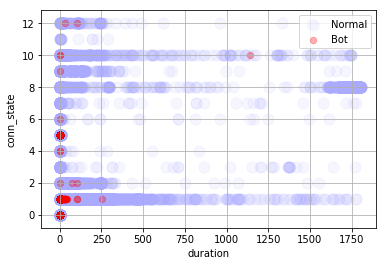

In [15]:
k1 = 'duration'
k2 = 'conn_state'
scat(normal_df[k1], normal_df[k2], bot_df[k1], bot_df[k2], k1, k2)

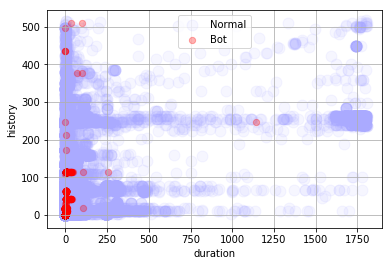

In [16]:
k1 = 'duration'
k2 = 'history'
scat(normal_df[k1], normal_df[k2], bot_df[k1], bot_df[k2], k1, k2)

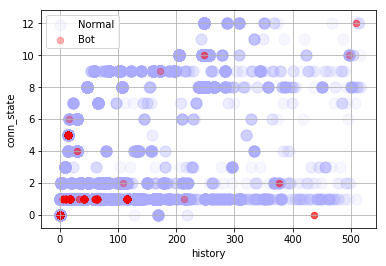

In [17]:
k1 = 'history'
k2 = 'conn_state'
scat(normal_df[k1], normal_df[k2], bot_df[k1], bot_df[k2], k1, k2)

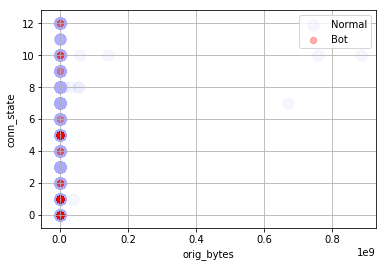

In [18]:
k1 = 'orig_bytes'
k2 = 'conn_state'
scat(normal_df[k1], normal_df[k2], bot_df[k1], bot_df[k2], k1, k2)

### RandomForest

In [19]:
import sklearn.ensemble

# Random forests classifier
# 12 trees
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=12)

# Labels: scan, normal
y = np.array(training_df['class'].tolist())

In [20]:
# Cross validation
def cross_score(lst):
    X = training_df.as_matrix(lst)
    scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    return scores.mean()

In [21]:
# Traverse combination
from itertools import permutations, combinations
keys = ['duration', 'conn_state', 'orig_bytes', 'history', 'id.resp_p']
n = len(keys)

for i in range(1, n+1):
    for lst in combinations(keys, i):
        print(cross_score(lst), lst)

0.8226919709995286 ('duration',)
0.8160108639536711 ('conn_state',)
0.7798276132971201 ('orig_bytes',)
0.8930966757199614 ('history',)
0.9095239164104061 ('id.resp_p',)
0.8535476195820519 ('duration', 'conn_state')
0.913203968485556 ('duration', 'orig_bytes')
0.9235943076474153 ('duration', 'history')
0.9262676483131692 ('duration', 'id.resp_p')
0.8719815492357075 ('conn_state', 'orig_bytes')
0.8924244124711004 ('conn_state', 'history')
0.9245987744382843 ('conn_state', 'id.resp_p')
0.9148795762160221 ('orig_bytes', 'history')
0.943706089650064 ('orig_bytes', 'id.resp_p')
0.9510718053466813 ('history', 'id.resp_p')
0.9259500347915871 ('duration', 'conn_state', 'orig_bytes')
0.9219198222262127 ('duration', 'conn_state', 'history')
0.9319701016812193 ('duration', 'conn_state', 'id.resp_p')
0.9514141096720612 ('duration', 'orig_bytes', 'history')
0.9721801979753539 ('duration', 'orig_bytes', 'id.resp_p')
0.953078494309892 ('duration', 'history', 'id.resp_p')
0.9158829206976276 ('conn_stat

In [22]:
# Train on a 80/20 split
from sklearn.model_selection import train_test_split

# Use all features
X = training_df.as_matrix(keys)

# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Training Result

In [23]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
def plot_cm(cm, labels):
    # Compute percentanges
    percent = (cm * 100.0) / np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way

    print('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('\n\n')

Confusion Matrix Stats
normal/normal: 97.12% (303/312)
normal/scan: 2.88% (9/312)
scan/normal: 1.40% (4/285)
scan/scan: 98.60% (281/285)


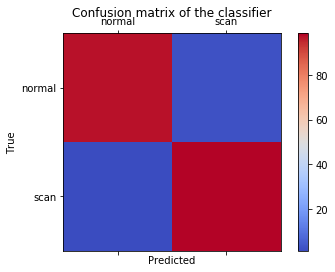

In [24]:
# Plot result
labels = ['normal', 'scan']
cm = confusion_matrix(y_test, y_pred, labels)
plot_cm(cm, labels)

In [25]:
# Show the "weight" of each feature
importances = zip(keys, clf.feature_importances_)
list(importances)

[('duration', 0.14176271277175),
 ('conn_state', 0.16824317169230926),
 ('orig_bytes', 0.1272308826975578),
 ('history', 0.2442118547898168),
 ('id.resp_p', 0.3185513780485661)]

### Test Result

In [26]:
# Use model to classify
def test(log):
    _X = [[log['duration'], log['conn_state'], log['orig_bytes'], log['history'], log['id.resp_p']]]
    return clf.predict(_X)[0]

In [27]:
# Use training data and remaining normal data for test
c = 0
truen = 0
falsen = 0
test_df = pd.concat([normal_df, bot_df],ignore_index=True)
for index, row in test_df.iterrows():
    if test(row) != row['class']:
        c += 1
        if row['class'] == 'scan':
            falsen += 1
        else:
            truen += 1
1-c/test_df.shape[0]

0.9264722346618899

In [28]:
# Total testing data
test_df.shape[0]

35728

In [29]:
# normal → scan
truen

2620

In [30]:
# scan → normal
falsen

7

In [31]:
# 自制数据集

以下日志中的数据量过少，并没有使用

In [32]:
# Http log
http_df = LogToDataFrame('CTU-13 Dataset/5 - 46/http.log')

http_df.dtypes

Successfully monitoring CTU-13 Dataset/5 - 46/http.log...


filename             object
host                 object
id.orig_h            object
id.orig_p             int64
id.resp_h            object
id.resp_p             int64
info_code             int64
info_msg             object
method               object
orig_fuids           object
orig_mime_types      object
password             object
proxied              object
referrer             object
request_body_len      int64
resp_fuids           object
resp_mime_types      object
response_body_len     int64
status_code           int64
status_msg           object
tags                 object
trans_depth           int64
uid                  object
uri                  object
user_agent           object
username             object
dtype: object

In [33]:
# Split bot data
conn_http = http_df['id.orig_h']=='147.32.84.165'
bot_http_df = http_df[conn_http]
bot_http_df.shape[0]

134

In [34]:
# Split normal data
normal_http_df = http_df[~conn_http]
normal_http_df.shape[0]

37255

## Bro log with C2

In [35]:
# Read into dataframe
df = LogToDataFrame('CTU-13 Dataset/8 - 49/conn.log')
df['duration'] = [d / np.timedelta64(1, 's') for d in df.ix[:,"duration"]]

df.dtypes

Successfully monitoring CTU-13 Dataset/8 - 49/conn.log...


conn_state         object
duration          float64
history            object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
local_orig           bool
local_resp           bool
missed_bytes        int64
orig_bytes          int64
orig_ip_bytes       int64
orig_pkts           int64
proto              object
resp_bytes          int64
resp_ip_bytes       int64
resp_pkts           int64
service            object
tunnel_parents     object
uid                object
dtype: object

In [36]:
# Show some staff
df[['id.orig_h', 'id.resp_p','conn_state', 'duration', 'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'resp_bytes', 'resp_ip_bytes', 'resp_pkts']]

,id.orig_h,id.resp_p,conn_state,duration,orig_bytes,orig_ip_bytes,orig_pkts,resp_bytes,resp_ip_bytes,resp_pkts
ts,,,,,,,,,,
2011-08-16 20:18:56.164300,66.249.66.10,80,SF,0.000322,0,104,2,0,52,1
2011-08-16 20:18:56.235063,76.19.18.112,80,S0,0.000163,0,48,1,0,52,1
2011-08-16 20:18:56.235069,76.19.18.112,443,S0,0.000166,0,48,1,0,52,1
2011-08-16 20:18:56.178195,147.32.86.20,80,SF,0.206312,139,747,15,30022,31030,25
2011-08-16 20:18:56.241052,147.32.86.168,443,SF,0.213364,987,1515,10,2462,2938,9
2011-08-16 20:18:56.464620,147.32.85.123,80,SF,0.021754,428,696,5,560,828,5
2011-08-16 20:18:56.342244,147.32.84.229,52183,RSTR,0.156994,0,40,1,0,40,1
2011-08-16 20:18:56.447418,147.32.86.168,443,SF,0.215993,1034,1562,10,2604,3080,9
2011-08-16 20:18:56.647854,147.32.84.170,80,SF,0.017802,0,216,4,0,164,3


In [37]:
# Same logic
states = df['conn_state'].unique()
states_dic = dict(zip(states, list(range(len(states)))))
states_dic

{'OTH': 9,
 'REJ': 6,
 'RSTO': 5,
 'RSTOS0': 4,
 'RSTR': 2,
 'RSTRH': 8,
 'S0': 1,
 'S1': 10,
 'S2': 12,
 'S3': 11,
 'SF': 0,
 'SH': 3,
 'SHR': 7}

In [38]:
df['conn_state'] = df['conn_state'].apply(lambda x: states_dic.get(x,x))
df['conn_state'].head()

ts
2011-08-16 20:18:56.164300    0
2011-08-16 20:18:56.235063    1
2011-08-16 20:18:56.235069    1
2011-08-16 20:18:56.178195    0
2011-08-16 20:18:56.241052    0
Name: conn_state, dtype: int64

In [39]:
history = df['history'].unique()
history_dic = dict(zip(history, list(range(len(history)))))

df['history'] = df['history'].apply(lambda x: history_dic.get(x,x))
df['history'].head()

ts
2011-08-16 20:18:56.164300    0
2011-08-16 20:18:56.235063    1
2011-08-16 20:18:56.235069    1
2011-08-16 20:18:56.178195    2
2011-08-16 20:18:56.241052    2
Name: history, dtype: int64

In [40]:
service = df['service'].unique()
service_dic = dict(zip(service, list(range(len(history)))))

df['service'] = df['service'].apply(lambda x: service_dic.get(x,x))
df['service'].head()

ts
2011-08-16 20:18:56.164300    0
2011-08-16 20:18:56.235063    0
2011-08-16 20:18:56.235069    0
2011-08-16 20:18:56.178195    1
2011-08-16 20:18:56.241052    2
Name: service, dtype: int64

In [41]:
# Split bot data and set class
conn = df['id.orig_h'] == '147.32.84.165'
bot_df = df[conn]
bot_df['class'] = 'C2'
bot_df.shape[0]

6131

In [42]:
bot_df['proto'].value_counts()

tcp     5839
udp      291
icmp       1
Name: proto, dtype: int64

In [43]:
# Split normal data and set class
normal_df = df[~conn]
normal_df['class'] = 'normal'
normal_df.shape[0]

3871909

In [44]:
# Use same amount of data
training_df = pd.concat([normal_df[:bot_df.shape[0]], bot_df], ignore_index=True)
training_df = training_df.reindex(np.random.permutation(training_df.index))

training_df.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,class
498,0,0.000273,27,147.32.84.138,36654,147.32.80.9,53,False,False,0,...,67,1,udp,91,119,1,3,(empty),CGdxaQ2YIkOPMRsyj9,normal
11252,0,60.966146,47,147.32.84.165,2914,222.189.228.111,3389,False,False,0,...,329,6,tcp,403,571,4,1,(empty),CnxVyUCli9n3DkPGd,C2
1287,0,0.000237,27,147.32.84.138,49397,147.32.80.9,53,False,False,0,...,67,1,udp,91,119,1,3,(empty),CXACV1z45b1Cpa18l,normal
5305,0,0.000198,27,147.32.84.138,33133,147.32.80.9,53,False,False,0,...,67,1,udp,91,119,1,3,(empty),CkShLmuFbFGLVqO3i,normal
2541,0,0.000413,27,147.32.85.7,51369,147.32.80.9,53,False,False,0,...,62,1,udp,154,182,1,3,(empty),COd8Nw4ODRcri52EI7,normal


### Training Model

In [45]:
# Cross validation
def cross_score(lst):
    X = training_df.as_matrix(lst)
    scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    return scores.mean()

In [46]:
from itertools import permutations, combinations
import sklearn.ensemble

# 15 Trees
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=15)

# Labels: C2, normal
y = np.array(training_df['class'].tolist())

In [47]:
# Traverse feature combination
keys = ['duration', 'conn_state', 'orig_bytes', 'history', 'id.resp_p', 'service',  'resp_bytes']
n = len(keys)

for i in range(1, n+1):
    for lst in combinations(keys, i):
        print(cross_score(lst), lst)

0.9493558474295719 ('duration',)
0.8657647201160404 ('conn_state',)
0.9335335590858751 ('orig_bytes',)
0.9531879901775042 ('history',)
0.9926599180217801 ('id.resp_p',)
0.7163596139604947 ('service',)
0.9142876895729714 ('resp_bytes',)
0.964850874359005 ('duration', 'conn_state')
0.9698254073982484 ('duration', 'orig_bytes')
0.977736185952023 ('duration', 'history')
0.9911105615760665 ('duration', 'id.resp_p')
0.9568577985005671 ('duration', 'service')
0.9702330383127856 ('duration', 'resp_bytes')
0.9727612540566988 ('conn_state', 'orig_bytes')
0.9532696227220333 ('conn_state', 'history')
0.9928230501588112 ('conn_state', 'id.resp_p')
0.9080899978860627 ('conn_state', 'service')
0.9608546688098534 ('conn_state', 'resp_bytes')
0.9843420403615764 ('orig_bytes', 'history')
0.9924153527682605 ('orig_bytes', 'id.resp_p')
0.9379376614536177 ('orig_bytes', 'service')
0.9442988841336379 ('orig_bytes', 'resp_bytes')
0.9926601839258341 ('history', 'id.resp_p')
0.9559612365070311 ('history', 'ser

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix
def plot_cm(cm, labels):
    # Compute percentanges
    percent = (cm * 100.0) / np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way

    print('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('\n\n')

### Result

Confusion Matrix Stats
C2/C2: 99.37% (1255/1263)
C2/normal: 0.63% (8/1263)
normal/C2: 0.25% (3/1190)
normal/normal: 99.75% (1187/1190)


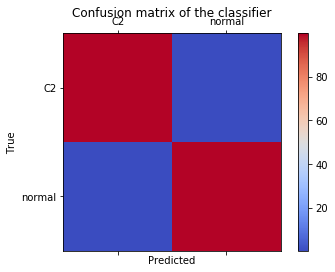

In [49]:
# Train on a 80/20 split
keys = ['duration', 'conn_state', 'orig_bytes', 'id.resp_p', 'service', 'resp_bytes']

X = training_df.as_matrix(keys)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Show the result
labels = ['C2', 'normal']
cm = confusion_matrix(y_test, y_pred, labels)
plot_cm(cm, labels)

In [50]:
# Show the "weight" of each feature
importances = zip(keys, clf.feature_importances_)
list(importances)

[('duration', 0.3898010396397264),
 ('conn_state', 0.08743553379533055),
 ('orig_bytes', 0.1859358114131167),
 ('id.resp_p', 0.2798433049947983),
 ('service', 0.006669910028969976),
 ('resp_bytes', 0.050314400128057976)]

### Test

In [51]:
# Use another Bro log to test
test_df = LogToDataFrame('CTU-13 Dataset/6 - 47/conn.log')
test_df['duration'] = [d / np.timedelta64(1, 's') for d in test_df.ix[:,"duration"]]

# Diff in service types
temp = list(set(test_df['service'].unique())-set(service))
# New mapping
for s in temp:
    service_dic[s]=len(service_dic)+1
    
print(temp)

Successfully monitoring CTU-13 Dataset/6 - 47/conn.log...
['smtp,ssl']


In [52]:
# same logic
test_df['conn_state'] = test_df['conn_state'].apply(lambda x: states_dic.get(x,x))
test_df['service'] = test_df['service'].apply(lambda x: service_dic.get(x,x))

test_df.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,orig_bytes,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid
ts,,,,,,,,,,,,,,,,,,,,
2011-08-16 16:01:46.977232,4,0.009599,AR,117.211.100.130,43458,147.32.86.92,80,False,False,0,0,208,4,tcp,0,0,0,0,(empty),CssCvs3w5tpt6mh3me
2011-08-16 16:01:47.028384,4,0.008886,AR,117.211.100.130,59391,147.32.86.92,80,False,False,0,0,208,4,tcp,0,0,0,0,(empty),Cwz9YUGvgvverNQkj
2011-08-16 16:01:47.078695,4,0.013267,AR,117.211.100.130,48010,147.32.86.92,80,False,False,0,0,208,4,tcp,0,0,0,0,(empty),Ckd7X1kN3XNk3Zq5i
2011-08-16 16:01:47.123759,4,0.008867,AR,117.211.100.130,52517,147.32.86.92,80,False,False,0,0,208,4,tcp,0,0,0,0,(empty),CyhYAl1WM4IjW61whd
2011-08-16 16:01:47.163577,4,0.009059,AR,117.211.100.130,59018,147.32.86.92,80,False,False,0,0,208,4,tcp,0,0,0,0,(empty),CgSoCT1BJJj7BrrQuf


In [53]:
# Split bot data and set the class
test_conn = test_df['id.orig_h']=='147.32.84.165'
test_bot = test_df[test_conn]
test_bot['class'] = 'C2'

test_bot.shape[0]

5439

In [54]:
# Split normal data and set the class
test_normal = test_df[~test_conn]
test_normal['class'] = 'normal'

test_normal.shape[0]

722733

In [55]:
# Compat data for testing
t_df = pd.concat([test_bot, test_normal[:test_bot.shape[0]]], ignore_index=True)
t_df = t_df.reindex(np.random.permutation(t_df.index))
t_df.head()

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,class
45,1,0.000000,S,147.32.84.165,1259,66.252.208.228,25,False,False,0,...,48,1,tcp,0,0,0,0,(empty),CDberuapLN5J4PO5,C2
6423,0,0.000321,Dd,147.32.84.59,55260,147.32.80.9,53,False,False,0,...,90,1,udp,112,140,1,3,(empty),CHq3204E8y9DEUQ1O,normal
2987,1,2.998966,S,147.32.84.165,1582,65.55.37.88,25,False,False,0,...,96,2,tcp,0,0,0,0,(empty),CuI7nZ2lwVyqdNEXD9,C2
2939,1,0.000000,S,147.32.84.165,1370,206.46.232.11,25,False,False,0,...,48,1,tcp,0,0,0,0,(empty),CBJFKU1tJhYFKt976g,C2
5206,1,0.000000,S,147.32.84.165,3352,216.27.94.106,25,False,False,0,...,48,1,tcp,0,0,0,0,(empty),C58jTA2MCRjXN29J78,C2


In [56]:
# Use model to classify
def testc2(log):
    _X = [[log['duration'], log['conn_state'], log['orig_bytes'], log['id.resp_p'], log['service'], log['resp_bytes']]]
    return clf.predict(_X)[0]

In [57]:
# Testing...
c, truen, falsen = 0, 0, 0
for index, row in t_df.iterrows():
    if testc2(row) != row['class']:
        c += 1
        if row['class'] == 'C2':
            falsen += 1
        else:
            truen += 1
1-c/t_df.shape[0]

0.49816142673285535

In [58]:
# normal → C2
truen

25

In [59]:
# C2 → normal
falsen

5434

In [60]:
# Again, testing...
# Use bot and remaining normal training data
c, truen, falsen = 0, 0, 0
temp_df = pd.concat([normal_df[bot_df.shape[0]:bot_df.shape[0]*2], bot_df], ignore_index=True)
temp_df = training_df.reindex(np.random.permutation(temp_df.index))
for index, row in temp_df.iterrows():
    if testc2(row) != row['class']:
        c += 1
        if row['class'] == 'C2':
            falsen += 1
        else:
            truen += 1
print(1-c/temp_df.shape[0])
print(truen)
print(falsen)

0.9986951557657805
3
13
